 10000


Рассеяние: 961768, Поглощение: 95865


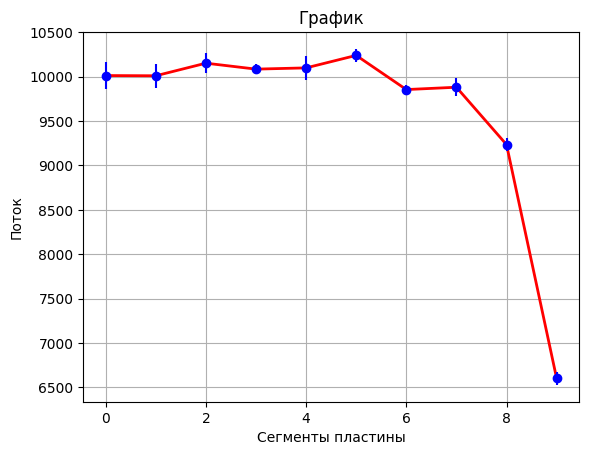

In [32]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt


Particles =int(input())  
H = 100  
sigma_s = 0.3  
sigma_a = 0.03  
sigma_tot = sigma_s + sigma_a 
h = 10  
N = int(H / h)  


Scattering = 0  
Absorption = 0  
Absorbed = 0  
Count = 0  
S = 0  


n = np.zeros((3, N))  
f = np.zeros((10, N)) 


def simulate_particle(x, iter_num):
   
    scattering = 0
    absorption = 0
    absorbed = 0
    count = 0
    secondary_scattering = 0

    while True:
      
        cos = 2 * random.random() - 1 
        l = (-1 / sigma_tot) * np.log(random.random())  
        fin = x + cos * l  

        if fin >= H:  
            absorbed += 1
            if count > 0:
                secondary_scattering += 1
            break
        elif fin <= 0:  
            fin = -fin

        
        if random.random() < (sigma_s / sigma_tot):  
            scattering += 1
            if scattering > 1:
                count += 1
            j = int(fin / h)  
            n[0][j] += 1 
            f[iter_num, j] += 1  
            x = fin  
        else:  
            absorption += 1
            if count > 0:
                secondary_scattering += 1
            j = int(fin / h) 
            n[1][j] += 1 
            break

    return scattering, absorption, absorbed, count, secondary_scattering


def average(arr):
   
    return np.sum(arr) / len(arr)


def sigma(arr, n):
   
    avg = average(arr)
    dif = np.sum((arr - avg) ** 2)
    return np.sqrt(dif / (n * (n - 1)))



for j in range(10):  
    for i in range(Particles):
        x = random.random() * H  
        scattering_i, absorption_i, absorbed_i, count_i, s_i = simulate_particle(x, j)

        
        Count += count_i
        Absorbed += absorbed_i
        Scattering += scattering_i
        Absorption += absorption_i
        S += s_i


print(f"Рассеяние: {Scattering}, Поглощение: {Absorption}")


for i in range(N):
    n[2, i] = n[0, i] / (sigma_a * h * Particles)


average_f = np.zeros(N)
sigma_f = np.zeros(N)

for i in range(N):
    average_f[i] = np.average(f[:, i])  
    sigma_f[i] = sigma(f[:, i], 10)  


x = np.arange(N)  
y = n[2]  

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, average_f, color='Red', linewidth=2, label="")
plt.errorbar(x, average_f, yerr=sigma_f, fmt='o', color='blue')
plt.grid()
plt.xlabel("Cегменты пластины")
plt.ylabel("Поток")
plt.title("График")
plt.show()


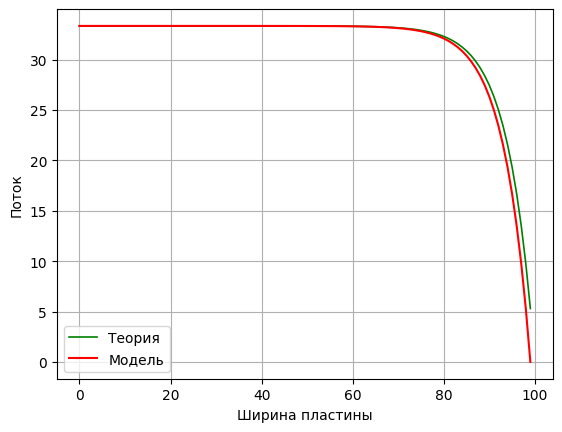

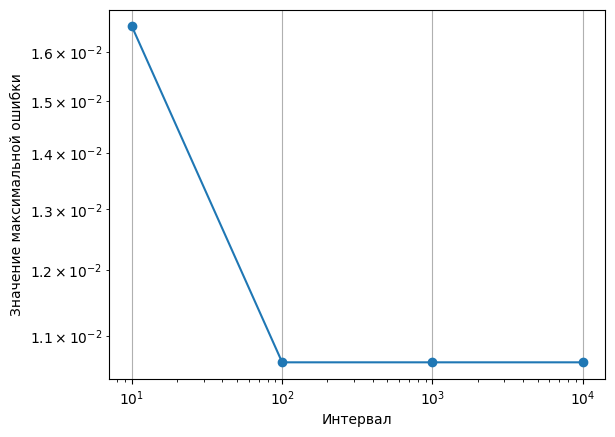

In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt


sigma_a = 0.03
H = 100
h = 1
D = 1
L = (1 / sigma_a) ** (1 / 2)
Q = 1
q = Q * h
a = -D / h
c = -D / h
N = int(H / h)


def calculate_flow(): 
  
    b = np.zeros(N)
    b[0] = sigma_a * h - c
    b[N - 1] = sigma_a * h - a + 1000
    b[1:N - 1] = sigma_a * h - c - a

    A = np.zeros(N)
    B = np.zeros(N)

    A[0] = q / b[0]
    B[0] = c / b[0]

    for i in range(N - 1):
        A[i + 1] = (q - a * A[i]) / (b[i + 1] - a * B[i])
        B[i + 1] = c / (b[i + 1] - a * B[i])

    Flow = np.zeros(N)
    Flow[N - 1] = A[N - 1]
    for i in range(N - 2, -1, -1):
        Flow[i] = A[i] - B[i] * Flow[i + 1]

    return Flow


def theoretical_flow():
   
    x = np.arange(H)
    return (Q / sigma_a) * (1 - np.cosh(x / L) / np.cosh(H / L))


def calculate_max_error(intervals, Flow, Flow_Theory):
    max_errors = []
    for interval in intervals:
        errors = []
        for start in range(0, H, interval):
            end = min(start + interval, H)
            Flow_err = Flow[start:end]
            Flow_Theory_part = Flow_Theory[start:end]
            
            relative_error = np.sum(np.abs(Flow_err - Flow_Theory_part)) / np.sum(np.abs(Flow_Theory_part))
            errors.append(relative_error)
    
        max_errors.append(np.mean(errors))
    return max_errors

def plot_flow(Flow, Flow_Theory):
   
    x = np.arange(H)
    plt.figure()
    plt.plot(x, Flow_Theory, color='green', linewidth=1.2, label="Теория")
    plt.plot(x, Flow, color='red', label="Модель")
    plt.xlabel('Ширина пластины')
    plt.ylabel('Поток')
    plt.legend()
    plt.grid()
    plt.show()


def plot_max_error(intervals, max_errors):
    
    plt.figure()
    plt.plot(intervals, max_errors, marker='o')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Интервал')
    plt.ylabel('Значение максимальной ошибки')
    plt.grid()
    plt.show()

Flow = calculate_flow()
Flow_Theory = theoretical_flow()
intervals = [10, 100, 1000, 10000]
max_errors = calculate_max_error(intervals, Flow, Flow_Theory)


plot_flow(Flow, Flow_Theory)
plot_max_error(intervals, max_errors)


